In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

# Importing the data

In [2]:
df = pd.read_excel('ENB2012_data.xlsx')

# df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [6]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

df.rename(columns=column_names, inplace=True)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## From the dataframe above, we can say that
- No null or categorical variables are present
- we have 8 input variables and 2 output variables

# The task here is to make use of the input variables to predict the 2 output variables (Regression)

## Exploratory Data Analysis

In [7]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


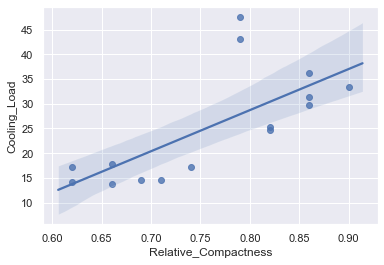

In [8]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness',
                           'Cooling_Load']].sample(15, random_state=2)

#regression plot
sns.regplot(x="Relative_Compactness",
            y="Cooling_Load",
            data=simple_linear_reg_df)

Text(0.5, 1.0, 'Histograms showing the distribution of variables in the two output variables')

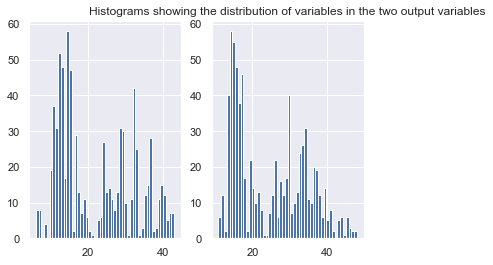

In [9]:
### Checking to see if the dataset is inbalanced
fig, axes = plt.subplots(1,2)
axes[0].hist(df['Heating_Load'], bins=50)
axes[1].hist(df['Cooling_Load'],  bins=50)
plt.title('Histograms showing the distribution of variables in the two output variables')

### There seem to be a similarity between the two outputs variables

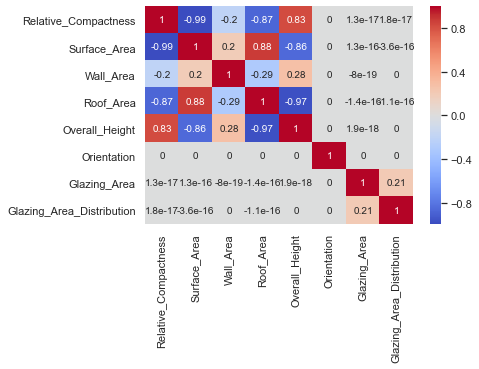

In [11]:
sns.heatmap(df.drop(['Heating_Load', 'Cooling_Load'], axis=1).corr(), annot=True, cmap='coolwarm')

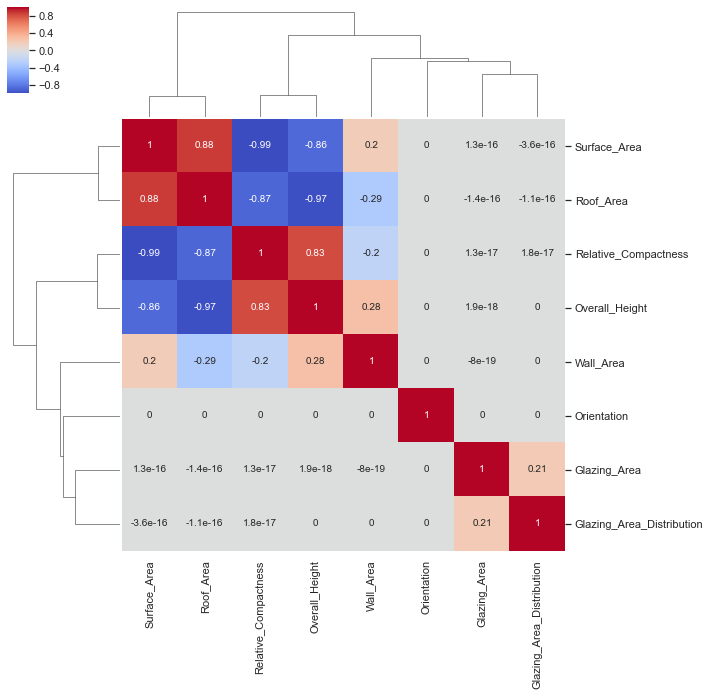

In [12]:
sns.clustermap(df.drop(['Heating_Load', 'Cooling_Load'], axis=1).corr(), annot=True, cmap='coolwarm')

### There are some obvious relationships(direct and inverse) between the first five features and also a slight relationship between Glazing area and glazing area distribution.

Text(0.5, 1.0, 'Heatmap showing correlations between the input and output variables')

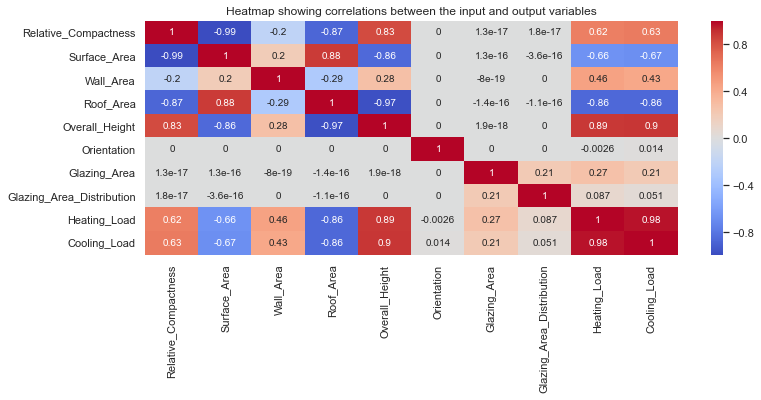

In [13]:
# creating a heatmap to check for correlation between the input and output variables

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)
plt.title('Heatmap showing correlations between the input and output variables')

## Feature Selection

In [14]:
## droping the X6 and X8 features as they show very little correlations to the output features

newdf = df.drop(['Orientation', 'Glazing_Area_Distribution'], axis=1)

## Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
heating_target= df['Heating_Load']



In [18]:
## Feature Separation
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, heating_target, test_size= 0.3, random_state=1)

# Building Prediction models and evaluating them usung different measures

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Simple Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)

model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [22]:
linear_pred = model.predict(X_test)

print('Mean absolute Error: ', mean_absolute_error(y_test, linear_pred))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(y_test - linear_pred)))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, linear_pred)))
print('R Squared: ', r2_score(y_test, linear_pred))

Mean absolute Error:  0.06296742865143842
Residual Sum of Squares (RSS):  1.816691850708439
Root Mean Squared Error:  0.08868182951531683
R Squared:  0.8938550769308062


## Feature Selection and LASSO Regression

In [25]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [26]:
lasso_pred = lasso_reg.predict(X_test)

print('Mean absolute Error: ', mean_absolute_error(y_test, lasso_pred))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(y_test - lasso_pred)))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, lasso_pred)))
print('R Squared: ', r2_score(y_test, lasso_pred))

Mean absolute Error:  0.06558614505797825
Residual Sum of Squares (RSS):  1.9203832200369055
Root Mean Squared Error:  0.09117755904216254
R Squared:  0.8877966403192161


## RIDGE Regression

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.5)

ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [29]:
ridge_pred = ridge_reg.predict(X_test)

print('Mean absolute Error: ', mean_absolute_error(y_test, ridge_pred))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(y_test - ridge_pred)))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, ridge_pred)))
print('R Squared: ', r2_score(y_test, ridge_pred))

Mean absolute Error:  0.06400095031479862
Residual Sum of Squares (RSS):  1.8484143654097434
Root Mean Squared Error:  0.08945274612695
R Squared:  0.8920016069098898


## Elastic Net Regression

In [56]:
from sklearn.linear_model import ElasticNet

emodel = ElasticNet(alpha=0.00000001, max_iter=10000)

emodel.fit(X_train, y_train)

ElasticNet(alpha=1e-08, max_iter=10000)

In [57]:
e_pred = emodel.predict(X_test)

print('Mean absolute Error: ', mean_absolute_error(y_test, e_pred))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(y_test - e_pred)))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, e_pred)))
print('R Squared: ', r2_score(y_test, e_pred))

Mean absolute Error:  0.06296743494310293
Residual Sum of Squares (RSS):  1.816692185237924
Root Mean Squared Error:  0.0886818376803464
R Squared:  0.8938550573850553


# comparing the effects of regularisation

In [36]:
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing_Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482


# The Best model was the linear Model and the best metric was the R Squared